In [1]:
data <- read.csv("DeathPenalty.csv")

In [2]:
data[1:4,]

Agg,VRace,Death
1,1,1
1,1,1
1,1,0
1,1,0


In [3]:
data[359:362,]

,Agg,VRace,Death
359,6,0,1
360,6,0,1
361,6,0,1
362,6,0,1


In [4]:
m1=glm(Death~VRace+Agg,family=binomial,data=data)
m1


Call:  glm(formula = Death ~ VRace + Agg, family = binomial, data = data)

Coefficients:
(Intercept)        VRace          Agg  
     -6.676        1.811        1.540  

Degrees of Freedom: 361 Total (i.e. Null);  359 Residual
Null Deviance:	    321.9 
Residual Deviance: 113.5 	AIC: 119.5

In [5]:
summary(m1)


Call:
glm(formula = Death ~ VRace + Agg, family = binomial, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7526  -0.2658  -0.1083  -0.1083   3.2069  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -6.6760     0.7574  -8.814  < 2e-16 ***
VRace         1.8106     0.5361   3.377 0.000732 ***
Agg           1.5397     0.1867   8.246  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 321.88  on 361  degrees of freedom
Residual deviance: 113.48  on 359  degrees of freedom
AIC: 119.48

Number of Fisher Scoring iterations: 7


In [6]:
exp(m1$coef[2])

VRace 
6.1144

In [7]:
exp(m1$coef[3])

Agg 
4.663011

Question #3

In [9]:
fitBlack=dim(501)
fitWhite=dim(501)
ag=dim(501)

In [11]:
for (i in 1:501) {
ag[i]=(99+i)/100
fitBlack[i]=exp(m1$coef[1]+ag[i]*m1$coef[3])/(1+exp(m1$coef[1]+ag[i]*m1$coef[3]))
fitWhite[i]=exp(m1$coef[1]+m1$coef[2]+ag[i]*m1$coef[3])/(1+exp(m1$coef[1]+m1$coef[2]+ag[i]*m1$coef[3]))
}

integer(0)

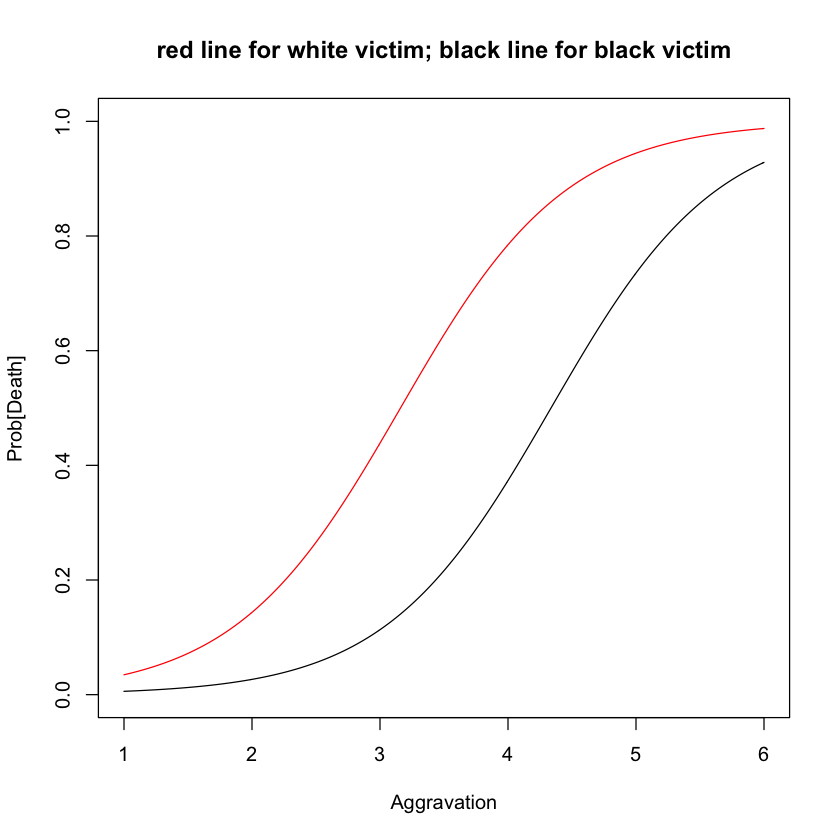

In [12]:
plot(fitBlack~ag,type="l",col="black",ylab="Prob[Death]",xlab="Aggravation",ylim=c(0,1),main="red line for white victim; black line for black victim")+
points(fitWhite~ag,type="l",col="red")